In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
movie=pd.read_csv("D:\data analysis\Movie Recommendation System\dataset\movie.csv")
rating=pd.read_csv("D:\data analysis\Movie Recommendation System\dataset\\rating.csv")
link=pd.read_csv("D:\data analysis\Movie Recommendation System\dataset\link.csv")
tag=pd.read_csv("D:\data analysis\Movie Recommendation System\dataset\\tag.csv")
genome_tag=pd.read_csv("D:\data analysis\Movie Recommendation System\dataset\genome_tags.csv")
genome_source=pd.read_csv("D:\data analysis\Movie Recommendation System\dataset\genome_scores.csv")

In [8]:
print(movie.head())

   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  


In [9]:
print(rating.head())

   userId  movieId  rating            timestamp
0       1        2     3.5  2005-04-02 23:53:47
1       1       29     3.5  2005-04-02 23:31:16
2       1       32     3.5  2005-04-02 23:33:39
3       1       47     3.5  2005-04-02 23:32:07
4       1       50     3.5  2005-04-02 23:29:40


In [10]:
print(link.head())

   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0


In [11]:
print(tag.head())

   userId  movieId            tag            timestamp
0      18     4141    Mark Waters  2009-04-24 18:19:40
1      65      208      dark hero  2013-05-10 01:41:18
2      65      353      dark hero  2013-05-10 01:41:19
3      65      521  noir thriller  2013-05-10 01:39:43
4      65      592      dark hero  2013-05-10 01:41:18


In [12]:
print(genome_tag.head())

   tagId           tag
0      1           007
1      2  007 (series)
2      3  18th century
3      4         1920s
4      5         1930s


In [13]:
print(genome_source.head())

   movieId  tagId  relevance
0        1      1    0.02500
1        1      2    0.02500
2        1      3    0.05775
3        1      4    0.09675
4        1      5    0.14675


In [16]:
print(movie.isnull().sum())

movieId    0
title      0
genres     0
dtype: int64


In [17]:
print(rating.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64


In [18]:
print(link.isnull().sum())

movieId      0
imdbId       0
tmdbId     252
dtype: int64


In [19]:
print(tag.isnull().sum())

userId        0
movieId       0
tag          16
timestamp     0
dtype: int64


In [20]:
print(genome_source.isnull().sum())

movieId      0
tagId        0
relevance    0
dtype: int64


In [21]:
print(genome_tag.isnull().sum())

tagId    0
tag      0
dtype: int64


In [22]:
tag

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18
...,...,...,...,...
465559,138446,55999,dragged,2013-01-23 23:29:32
465560,138446,55999,Jason Bateman,2013-01-23 23:29:38
465561,138446,55999,quirky,2013-01-23 23:29:38
465562,138446,55999,sad,2013-01-23 23:29:32


In [24]:
# Replace null values in the 'tag' column with "No Tag"
tag['tag'].fillna("No Tag", inplace=True)
print(tag.isnull().sum())

userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [26]:
# Summary statistics for the 'rating' column
print(rating['rating'].describe())

# Unique rating values
print("Unique Ratings:", rating['rating'].unique())

count    2.000026e+07
mean     3.525529e+00
std      1.051989e+00
min      5.000000e-01
25%      3.000000e+00
50%      3.500000e+00
75%      4.000000e+00
max      5.000000e+00
Name: rating, dtype: float64
Unique Ratings: [3.5 4.  3.  4.5 5.  2.  1.  2.5 0.5 1.5]


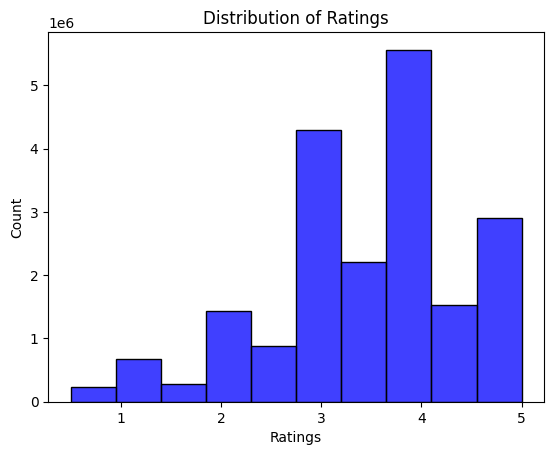

In [30]:
# Creating histogram for the 'rating' column
sns.histplot(rating['rating'], bins=10, kde=False, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [31]:
# Group by 'movieId' and calculate the average rating
average_ratings = rating.groupby('movieId')['rating'].mean()

# Sort by the highest ratings
top_rated_movies = average_ratings.sort_values(ascending=False).head(10)
print("Top Rated Movies:\n", top_rated_movies)

Top Rated Movies:
 movieId
95517     5.0
105846    5.0
89133     5.0
105187    5.0
105191    5.0
88488     5.0
126945    5.0
105526    5.0
105529    5.0
105841    5.0
Name: rating, dtype: float64


In [32]:
# Count the number of ratings per user
user_activity = rating.groupby('userId').size()

# Summary of user activity
print("User Activity Summary:")
print(user_activity.describe())

User Activity Summary:
count    138493.000000
mean        144.413530
std         230.267257
min          20.000000
25%          35.000000
50%          68.000000
75%         155.000000
max        9254.000000
dtype: float64
